In [2]:
%load_ext autoreload
%autoreload 2
import ipyrad
import ipyrad.analysis as ipa
import ipcoal
import matplotlib.pyplot as plt
import msprime
import numpy as np
import toytree
import toyplot
print(ipyrad.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.9.65


In [27]:
# Many loci
def simloci(sample_size_pop1=10,
            sample_size_pop2=10,
            get_pis=False,
            TMRCA=220e3,
            Ne=100000,
            Ne_ratio=1,
            mig=3e-3,
            sequence_length=100,
            num_replicates=10,
            debug=False):

    T_MRCA = TMRCA
    m_a_u = mig
    m_b_u = mig

    migmat = [[0, mig], [mig, 0]]
    sample_size_a=sample_size_pop1
    sample_size_b=sample_size_pop2

    ancpopa = msprime.PopulationConfiguration(sample_size=sample_size_a, initial_size=Ne)
    ancpopb = msprime.PopulationConfiguration(sample_size=sample_size_b, initial_size=Ne/Ne_ratio)

    ## All lineages coalesce at some point in the past
    atou_event = msprime.MassMigration(time=T_MRCA, source=0, destination=1, proportion=1.0)

#    au_change = msprime.MigrationRateChange(time=T_Extinction, rate=m_a_u, matrix_index=(0,1))
#    ua_change = msprime.MigrationRateChange(time=T_Extinction, rate=m_a_u, matrix_index=(1,0))

    demographic_events = [atou_event]

    dp = msprime.DemographyDebugger(
            Ne=Ne,
            population_configurations=[ancpopa, ancpopb],
            demographic_events=demographic_events)
    if debug:
        dp.print_history()

    ts = msprime.simulate(length=sequence_length,
            Ne=Ne,
            mutation_rate=1e-8,
            migration_matrix=migmat,
            population_configurations=[ancpopa, ancpopb],
            demographic_events=demographic_events,
            num_replicates=num_replicates)

    if debug:
        tree = next(next(ts).trees())
        f = "/tmp/watt.svg"
        tree.draw(f, height=600, width=600)
        show_svg(f)
    pis0 = []
    pis2 = []
    divs = []
    sfss = []
    for tre in ts:
        pop0 = tre.get_samples(0)
        pop2 = tre.get_samples(1)
        #pis0.append(tre.get_pairwise_diversity(pop0)/sequence_length)
        #pis2.append(tre.get_pairwise_diversity(pop2)/sequence_length)
        #divs.append(tre.divergence(sample_sets=[pop0, pop2]))
        sfss.append(tre.allele_frequency_spectrum([pop0, pop2], polarised=False, span_normalise=False))

    #return pis0, pis2, divs, sfss
    return np.mean(pis0), np.mean(pis2), np.mean(divs), (np.sum(sfss, axis=0)/np.sum(sfss)).flatten()
_, _, _, sfs = simloci(num_replicates=100)
sfs

array([0.        , 0.1732852 , 0.03971119, 0.01805054, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14801444, 0.07220217, 0.00361011, 0.00722022,
       0.01083032, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03249097, 0.03610108, 0.03249097,
       0.03610108, 0.02166065, 0.01083032, 0.00361011, 0.        ,
       0.        , 0.        , 0.        , 0.01083032, 0.02166065,
       0.02888087, 0.01444043, 0.01444043, 0.01083032, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00361011,
       0.01805054, 0.01444043, 0.03610108, 0.04693141, 0.03971119,
       0.00361011, 0.        , 0.        , 0.        , 0.        ,
       0.00361011, 0.        , 0.02166065, 0.01805054, 0.01083032,
       0.01444043, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01083032,
       0.        , 0.        , 0.        , 0.        , 0.     

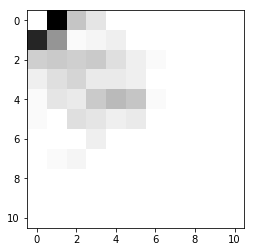

In [28]:
plt.imshow(np.reshape(sfs, (11, 11)), cmap="gray_r")

In [30]:
# generate a balance tree
tree = toytree.rtree.baltree(ntips=2, treeheight=1e5)

# draw the tree w/ an admixture edge
tree.draw(ts='p');

<svg class="toyplot-canvas-Canvas" height="260.0px" id="t4895531f79b042d2827c6813f6d96cb0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 260.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 r0 r1 0 50000 100000